## 1. Introduction

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We have to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get started analyzing these questions.


Below is a preview of a couple columns we'll work with from the dete_survey.csv:
- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv', encoding = 'utf-8')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding = 'utf-8')

# printing info about dete_survey
dete_survey.info()
print('\n \n ***********')
print(dete_survey.head())
print('\n \n ***********')

# printing info about tafe_survey
tafe_survey.info()
print('\n \n ***********')
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Observations

In [2]:
print(dete_survey.isnull().sum().sort_values(ascending = False))
print('\n ******')
print(tafe_survey.isnull().sum().sort_values(ascending = False))

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

These are the observations

| characteristic | `dete_survey` | `tafe_survey` |
| -------------- | ------------- | ------------- |
| total number of rows, cols | (822, 56) | (702, 72) |
| Number of null values in each cols (major) |[819, 815, 806, 799, 790, 696, 367, ----]|[589, 270, 265, 265 * 11, 262, 219, 172, ---- ]

- `dete_survey` has less number of columns than `tafe_survey` where the columns are missing
- Both `dete_survey` and `tafe_survey`contains many columns which we won't be needing to carryout our analysis
- In `dete_survey` there are date columns where a string 'Not Stated' is listed down. This should be converted as Nan
- Many of the columns have duplicated columns with a different column name


## 2. Identify Missing Values and Drop Unnecessary Columns

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.iloc[0:5,28:49]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M


Since the columns from `[28:49]` and `[17:66]` in the dataframes, `dete_survey` and `tafe_survey` respectively are not useful for our analysis, they can be dropped

In [4]:
print(dete_survey.shape, tafe_survey.shape)
dete_survey.drop(dete_survey.columns[28:49], axis = 1, inplace = True)
tafe_survey.drop(tafe_survey.columns[17:66], axis = 1, inplace = True)
print(dete_survey.shape, tafe_survey.shape)

(822, 56) (702, 72)
(822, 35) (702, 23)


## 3. Clean column names

There are many duplicate columns with a different column names in the both the datasets. If one looks at the analysis which we are interested in, below are some of the columns which we would like to use for our analysis.

| dete_survey | tafe_survey	| Definition |
| ----- | ----- | ---- |
| ID |	Record ID |	An id used to identify the participant of the survey |
| SeparationType |	Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR |	The year or month the participant's employment ended |
| DETE Start Date |	|	The year the participant began employment with the DETE |
| | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge.Current Age | The age of the participant |
| Gender | Gender.What is your Gender? | The gender of the participant |

Eventually, for our analysis we have to combine both the data sets to gain more insights and answer the two questions which were listed down earlier. Hence, it is of utmost importance to keep the column names same for same cateogories in both the surveys.
Also, it would be better if we follow the following so that the column names would be consistent
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
print(dete_survey.columns)
#dete_survey_updated = dete_survey.iloc[:,[0, 1, 2, 3, 5,  -6, -7]]
dete_survey_updated = dete_survey.copy(deep = True)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('\s+', ' ').str.replace(' ','_')
dete_survey_updated.head()

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated = tafe_survey.copy(deep = True)
map_dict = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(map_dict, axis = 1, inplace = True)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 4. Filtering the Data

Recall that our end goal is to answer the following question:
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If one sees the datasets, they would notice that the `separationtype` contains different separation types of the employees.

In [8]:
print('Unique values in dete \n',dete_survey_updated['separationtype'].value_counts())
print('\n \nUnique values in tafe \n',tafe_survey_updated['separationtype'].value_counts())

Unique values in dete 
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

 
Unique values in tafe 
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


We are interested in 'Resignation' because our objective is that. In tafe, `Resignation` column is obvious, but in dete the following three columns have to be looked at 
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [9]:
# Using df.copy to not set SettingWithCopy Warning 
pattern = r'^Resignation.*'
interested_df = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)]
dete_resignations = interested_df.copy(deep = True)
print(dete_resignations.head())
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy(deep = True)
tafe_resignations.head()

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 5. Verify the Data

We will look at the datasets for any logical inconsistencies in any of the columns which we are interested in. As stated in the section 3, the columns which we are interested in `dete_survey_updated` are:
- `cease_date`
- `dete_start_date`
- `age`
- `gender`

Let us plot and visualize each of those columns.

In [10]:
unique_values_dete = {}
unique_values_dete['cease_date'] = dete_resignations['cease_date'].value_counts()
unique_values_dete['dete_start_date'] = dete_resignations['dete_start_date'].value_counts()
print(unique_values_dete['cease_date'])
print('\n\n****\n', unique_values_dete['dete_start_date'],'\n\n')

print(dete_resignations['cease_date'].value_counts().sum(), dete_resignations['dete_start_date'].value_counts().sum())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64


****
 2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64 


300 283


Looking at the unique values, one thing is obvious, if we want to compare the columns `cease_date` and `dete_start_date` both should be in the same format. Right now, some rows in `cease_date` are in MM/YYYY format, if they are made to be in YYYY format, there will be consistemcy and it will be easy to compare.

In [11]:
# CAREFUL ::: This line should be executed only once
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split(pat = '/').str[-1].astype(np.float64)
dete_resignations['cease_date'].value_counts()
dete_resignations['dete_start_date'].value_counts()
# Now the format is same for cease_date and dete_start_date

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

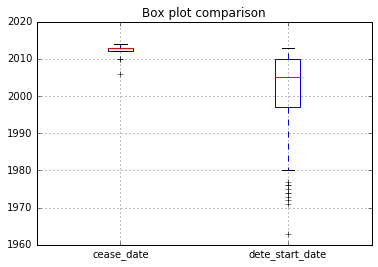

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = dete_resignations.boxplot(column = ['cease_date', 'dete_start_date'])
plt.title( 'Box plot comparison' )
#plt.suptitle('') # that's what you're after
plt.show()

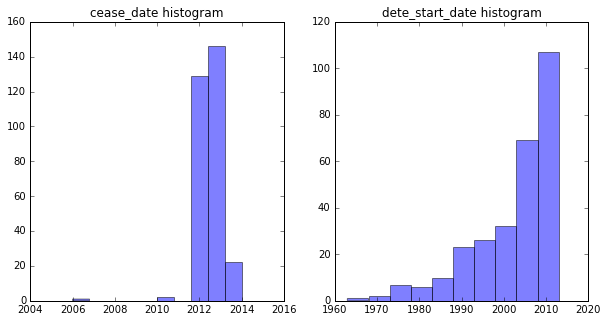

In [13]:
'''fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = dete_survey_updated['cease_date'].plot(kind='hist')
ax2 = dete_survey_updated['dete_start_date'].plot(kind='hist')
plt.show()'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.hist(dete_resignations['cease_date'].dropna(), alpha = 0.5) #Histogram cannot deal with Nan values
ax1.axis(xmin=2004,xmax=2016)
ax1.set_title('cease_date histogram')
ax2.hist(dete_resignations['dete_start_date'].dropna(), alpha = 0.5)
ax2.set_title('dete_start_date histogram')
plt.show()

### Observations
- `cease_date` is a more narrow distribution than `dete_start_date`
- Suddenly many people left at 2012 and 2013 (Any peculiar reason ?)
- In `dete_start_date` it can be seen that many people started working from 1965, 1970s onwards. 

**Overall the data looks Ok and there are no logical inconsistencies**

## 6. Creating a new column : Length of service

`tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.
Since we know the starting date of the service (`dete_start_date`) and resignation date (`cease_date`), we can calculating the `institute_service` column by subtracting the both

In [14]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [15]:
# value counts in percentages
dete_resignations['institute_service'].value_counts()*100/dete_resignations['institute_service'].value_counts().sum()

5.0     8.424908
1.0     8.058608
3.0     7.326007
0.0     7.326007
6.0     6.227106
4.0     5.860806
9.0     5.128205
2.0     5.128205
7.0     4.761905
13.0    2.930403
8.0     2.930403
20.0    2.564103
15.0    2.564103
10.0    2.197802
22.0    2.197802
14.0    2.197802
17.0    2.197802
12.0    2.197802
16.0    1.831502
18.0    1.831502
23.0    1.465201
11.0    1.465201
24.0    1.465201
39.0    1.098901
19.0    1.098901
21.0    1.098901
32.0    1.098901
28.0    0.732601
26.0    0.732601
25.0    0.732601
30.0    0.732601
36.0    0.732601
29.0    0.366300
33.0    0.366300
42.0    0.366300
27.0    0.366300
41.0    0.366300
35.0    0.366300
38.0    0.366300
34.0    0.366300
49.0    0.366300
31.0    0.366300
Name: institute_service, dtype: float64

**It should be noted that, more than 35% of the people resigned within the first 5 years of the service with the institute.** Hence it should be analysed why people resigned, Are they dissatisfied or is there any other reason.

## 7. Identifying Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [16]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
#print(tafe_resignations[tafe_resignations['Contributing Factors. Dissatisfaction'] == 'Contributing Factors. Dissatisfaction '])

print('\n\n***** Job Dissatisfacion ****** \n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
#print(tafe_resignations[tafe_resignations['Contributing Factors. Job Dissatisfaction'] == 'Job Dissatisfaction'])


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


***** Job Dissatisfacion ****** 

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [17]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
    

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)


Here, we updated the values in the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` in the `tafe_resignations` dataframe so that each contains only `True`, `False`, or `NaN` values. To achieve that, we wrote a function named `update_vals` that makes the following changes:
- If the value is NaN, return np.nan. We used the following criteria to check that a value is NaN: pd.isnull(val).
- If the value is '-', return False.
- For any other value, return True.

We also used the `DataFrame.applymap()` method to apply the function above to the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` in the tafe_resignations dataframe.
Remember that we need to pass the update_vals function into the df.applymap() method without parentheses.

Next,
- We will use the [`df.any() method`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) to create a dissatisfied column in BOTH the `tafe_resignations` and `dete_resignations` dataframes.
- We will use the [`df.copy() method`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) to create a copy of the results and avoid the SettingWithCopy Warning assigning the results to `dete_resignations_up` and `tafe_resignations_up`.

In [18]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)

In [19]:
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

**`tafe_resignations['dissatisfied']` columns looks ok and thus we can apply this method to `dete_resignations` too.**

In [20]:
list_dete = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
             'lack_of_recognition', 'lack_of_job_security','work_location', 'employment_conditions', 
             'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[list_dete].any(axis = 1, skipna = False)

In [21]:
#dete_resignations['dissatisfied']
print(dete_resignations.shape)
dete_resignations['dissatisfied'].value_counts()

(311, 37)


False    162
True     149
Name: dissatisfied, dtype: int64

In [22]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

We are using the `df.copy()` method to create a copy of the results and avoid the SettingWithCopy Warning

## 8. Combining the Data

We have two datasets right now, `dete_resignations_up` and `tafe_resignations_up`. We have to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
- Let's add a column named `institute` to `dete_resignations_up`. Each row should contain the value `DETE`.
- Let's add a column named `institute` to `tafe_resignations_up`. Each row should contain the value `TAFE`.

In [23]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [24]:
print(dete_resignations_up.shape, tafe_resignations_up.shape)

(311, 38) (340, 25)


In [25]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
print(combined.shape)
combined

(651, 53)


,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1998.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False


It could be seen that there are many columns which have `NaN` values. It could be argued that, if a column has too many `NaN` values, since `NaN` values will be discarded for the data analysis, that data representation is not correct across all the samples and such columns should be discarded from the data analysis. There are a total of 651 rows, hence arbitrarily, we can choose that if a column has less than 500 non null values, we can drop that column.

In [26]:
print(combined.shape)
combined_updated = combined.dropna(axis = 1, thresh = 500)
print(combined_updated.shape)

(651, 53)
(651, 10)


**Wow, we can see that 53 columns are reduced to 10.**

## 9. Cleaning the Service Column

In [27]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


These are too many values and for our analysis to be effective, we will segragate all into a group of 4 according to [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). These are
- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

Let us categororise `institute_service` into the above

In [28]:
institute_processed_series = combined_updated['institute_service'].astype('str').str.replace(r'\.0$','').astype('str').str.findall(r'[0-9]+')


# s = pd.Series(['NaN','7','3','11', 'Less than 1 year', '1-2', '11-20', '30','10.0','7-10','5-6', 'More than 15.0 years', '5.0'])
# s2 = s.str.replace(r'\.0','').astype('str').str.findall(r'[0-9]+')
# print(s2)

def service_cat_func(list_elements):
    #print(list_elements, type(list(list_elements)))
    list_elements = list(list_elements)
    list_elements = [float(item) for item in list_elements]
    val1 = 3 # Criteria for dividing service into 4 groups
    val2 = 7
    val3 = 11
    
    if not list_elements:
        # List is empty
        return np.nan
    else:
        #print(ele for ele in list_elements)
        condn_group1 = all(ele< val1 for ele in list_elements)
        condn_group2 = all((ele>= val1 and ele<= val2 - 1) for ele in list_elements)
        condn_group3 = all((ele>= val2 and ele<= val3 -1 ) for ele in list_elements)
        condn_group4 = all(ele>= val3 for ele in list_elements)
        
        if condn_group1 and not (condn_group2 or condn_group3 or condn_group4):
            return 'New'
        elif condn_group2 and not (condn_group1 or condn_group3 or condn_group4):
            return 'Experienced'
        elif condn_group3 and not (condn_group2 or condn_group1 or condn_group4):
            return 'Established'
        elif condn_group4 and not (condn_group2 or condn_group3 or condn_group1):
            return 'Veteran'
        else:
            return 'Logical Error!!!'
     


combined_updated['service_cat'] = institute_processed_series.apply(service_cat_func)
#combined_updated[combined_updated['service_cat'] == 'Logical Error!!!']
combined_updated['service_cat'].value_counts(dropna = False)

# s2.apply(service_cat_func)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

**Note: The warning of `SettingWithCopyWarning` is present because of the way the new column of `service_cat` is added on to the dataframe of `combined_updated`. However, it can be ignored because always the value of `service_cat` will be dependent on the `institute_service` column.** 



## 10. Performing Intial Analysis

The `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [29]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will fill the missing values in the column `dissatisfied` with the most frequently occuring value, i.e `False`

In [30]:
combined_updated['dissatisfied'].fillna(False, inplace = True)
combined_updated['dissatisfied'].value_counts(dropna = False) # expected no of False = 411, True = 240

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    411
True     240
Name: dissatisfied, dtype: int64

In [31]:
pd.pivot_table(combined_updated, index = 'service_cat',values = 'dissatisfied', aggfunc = np.mean)

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


- This implies that more than 50% of the `Established` persons are dissatisfied. 
- It also shows that the `New` or slightlty `Experienced` category people are not that dissatisfied.
- Dissatisfaction increases as the employee's time within the institute increases, and peaks around 7-10 years time, before decreasing slightly later

TAFE    340
DETE    311
Name: institute, dtype: int64


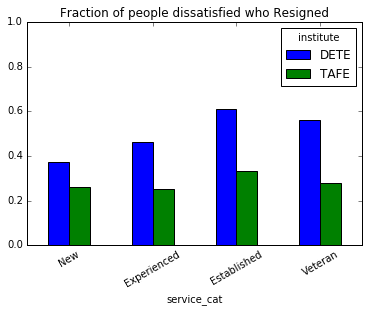

In [32]:
print(combined_updated['institute'].value_counts())
table1 = pd.pivot_table(combined_updated, index = 'service_cat', columns = 'institute', values = 'dissatisfied', aggfunc = np.mean)
desired_index = ['New', 'Experienced', 'Established', 'Veteran']
table1 = table1.reindex(desired_index)
ax = table1.plot.bar(rot= 30, ylim=[0,1])
ax.set_title('Fig-1 : Fraction of people dissatisfied who Resigned')

According to these two survethere are roughly same number of employees among `DETE` and `TAFE`, 311 and 340 respectively. Among the employees who resigned, we can observe the following.
- `DETE` has more dissatisfaction than `TAFE`, in some categories upto 60%
- In the case of `DETE`, dissatisfaction among the employees increased as they spent more time with the institute, peaking at 7-11 years, and slightly decreased among the employees who spent more than 11 years; whereas for the `TAFE` institute, the situtation is more or less the same irrespective of the time spent with the institute.

**These suggest that something is probably wrong with `DETE` than `TAFE`**


In [57]:
combined_updated['age'].value_counts(dropna = False)

41-45                  93
46-50                  81
36-40                  73
51-55                  71
26-30                  67
21-25                  62
31-35                  61
56-60                  55
NaN                    55
61 years or older      23
20 years or younger    10
Name: age, dtype: int64

This suggests we have to clean the age column in the dataframe

## 11. Cleaning the `age` column

The `age` column can be categorized as follows:
- 20 years or younger
- 21 - 25
- 26 - 30

   """"""
- 51 - 55
- 56 - 60
- 60 years or older

In [58]:
#age_processed_series = combined_updated['age'].astype('str').str.replace(r'\.0$','').astype('str').str.findall(r'[0-9]+')
processed_age_series = combined_updated['age'].str.replace(r'\.0','').astype('str').str.findall(r'[0-9]+')

# test_series = pd.Series(['NaN','51-55','41  45','56 or older', '20 or younger', '61 or older','31  35'])
# processed_test_series = test_series.str.replace(r'\.0','').astype('str').str.findall(r'[0-9]+')
# print(processed_test_series)

def clean_age(age_bracket):
    '''
    Function to clean the age column from the dataset. I/p: list of age, o/p: returns which category in string
    '''
    age_bracket = [int(element) for element in age_bracket]
    age_category = [[0, 20]] # 20 years or younger
    for num in range(20, 60, 5):
        age_category.append([num+1, num+5])
    age_category.append([61, 100])  # 61 years or older
    #print(age_category)
    
    if not age_bracket:
        # Requested age bracket is empty
        return np.nan
    else:
        for sub_cat in age_category:
            if all(element >= sub_cat[0] and element <= sub_cat[1] for element in age_bracket):
                if sub_cat[0] == 0:
                    return '20 years or younger'
                elif sub_cat[0] == 61:
                    return '61 years or older'
                else:
                    return '{}-{}'.format(sub_cat[0], sub_cat[1])
                
            else:
                pass
    
combined_updated['age'] = processed_age_series.apply(clean_age)      
combined_updated['age'].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



41-45                  93
46-50                  81
36-40                  73
51-55                  71
26-30                  67
21-25                  62
31-35                  61
56-60                  55
NaN                    55
61 years or older      23
20 years or younger    10
Name: age, dtype: int64

`age` column is cleaned from the dataset and we can proceed with the analysis corresponding to the relation between the various age bracket of the resigned employees and how many of them are dissatisfied

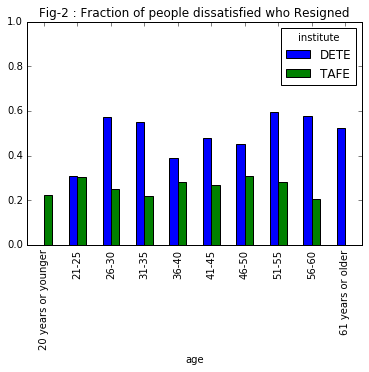

In [64]:
table2 = pd.pivot_table(combined_updated, index = 'age', columns = ['institute'], values = 'dissatisfied', aggfunc = np.mean)
desired_index = ['20 years or younger','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60', '61 years or older']
table2 = table2.reindex(desired_index)
ax = table2.plot.bar(rot= 90, ylim=[0,1])
ax.set_title('Fig-2 : Fraction of people dissatisfied who Resigned')
plt.show()

These results are also indicate that out of the employees who resigned,
- Employees from `DETE` are dissatisfied than from `TAFE`
- Interestingly, in `Fig-1`, the highest percentage of dissatisfied resigned employees were from the `Established` category, i.e, their service tenure is around `7-10` years. If we assume that most of the persons started their career at the `DETE` around an age of `26-30`, their age at the time of resignation should have been at `36-40`. But we are actually seeing a dip in the % of dissatisfied employees in the `Fig-2`

We will carryout additional analysis regarding that. But before, we will take a look at the table currently, and we will decide which columns give us more insight to carryout additional analysis of the dissatisfied employees

In [73]:
combined_updated.head()
combined_updated['gender'].value_counts()

Female    424
Male      168
Name: gender, dtype: int64

**Resigned employees are predominantly `Female`, almost 3.5x than `Male`. Is the intake of the employees in this proportion or does the `Female` employees are resigning in this proportion???**

In [72]:
table3 = pd.pivot_table(combined_updated, index = 'age', columns = ['institute','gender','service_cat'], values = 'dissatisfied', aggfunc = np.mean)
table3

institute                  DETE                                              \
gender                   Female                                        Male   
service_cat         Established Experienced       New   Veteran Established   
age                                                                           
20 years or younger         NaN         NaN  0.000000       NaN         NaN   
21-25                  0.000000    0.200000  0.384615       NaN         NaN   
26-30                  0.666667    0.533333  0.600000       NaN        0.75   
31-35                  0.777778    0.428571  0.000000  0.666667         NaN   
36-40                  0.500000    0.571429  0.200000  0.333333        1.00   
41-45                  0.600000    0.625000  0.285714  0.588235        1.00   
46-50                  0.500000    0.400000  0.500000  0.625000        0.00   
51-55                  0.500000    0.200000  1.000000  0.533333        1.00   
56-60                  0.500000    0.500000  1.000000  0.500000         NaN   
61 years or older      0.000000         NaN       NaN  0.555556        1.00   

institute                                                  TAFE              \
gender                                                   Female               
service_cat         Experienced       New   Veteran Established Experienced   
age                                                                           
20 years or younger         NaN       NaN       NaN         NaN    0.500000   
21-25                  0.250000  0.000000       NaN         NaN    0.444444   
26-30                  0.666667  0.000000       NaN    0.333333    0.285714   
31-35                  0.500000  0.666667       NaN    0.666667    0.000000   
36-40                  0.666667  1.000000  0.250000    0.500000    0.142857   
41-45                  0.333333  0.000000  0.500000         NaN    0.272727   
46-50                  0.000000       NaN  1.000000    0.333333    0.363636   
51-55                  1.000000  1.000000  1.000000    1.000000    0.400000   
56-60                       NaN       NaN  0.555556    0.000000    0.250000   
61 years or older      0.500000       NaN  1.000000         NaN         NaN   

institute                                                                \
gender                                       Male                         
service_cat               New Veteran Established Experienced       New   
age                                                                       
20 years or younger  0.250000     NaN         NaN    0.000000  0.000000   
21-25                0.333333     NaN         NaN    0.000000  0.166667   
26-30                0.235294     NaN         0.0    0.000000  0.500000   
31-35                0.200000    0.00         NaN    0.250000  0.250000   
36-40                0.428571    0.00         0.0    0.250000  0.400000   
41-45                0.076923    0.25         NaN    0.428571  0.444444   
46-50                0.300000    0.00         0.5    0.000000  0.400000   
51-55                0.000000    1.00         0.0    0.000000  0.571429   
56-60                0.000000    0.25         NaN    0.000000  0.500000   
61 years or older         NaN     NaN         NaN         NaN       NaN   

institute                      
gender                         
service_cat           Veteran  
age                            
20 years or younger       NaN  
21-25                     NaN  
26-30                     NaN  
31-35                     NaN  
36-40                1.000000  
41-45                0.000000  
46-50                0.333333  
51-55                0.500000  
56-60                0.166667  
61 years or older         NaN

## 12. Analysis by `Gender`

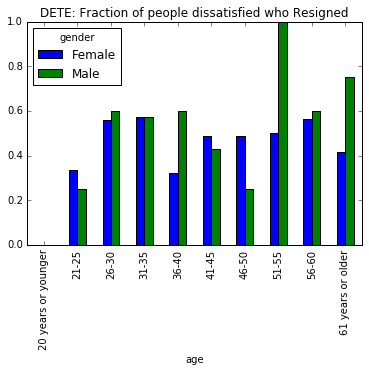

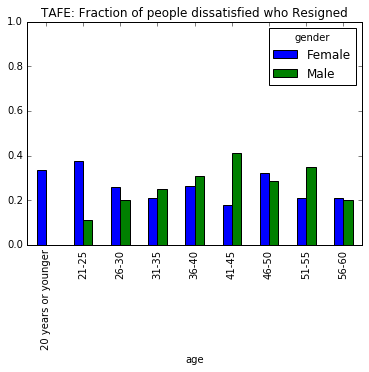

In [84]:
table4 = pd.pivot_table(combined_updated[combined_updated['institute']=='DETE'], index = 'age', columns = ['gender'], values = 'dissatisfied', aggfunc = np.mean)
table5 = pd.pivot_table(combined_updated[combined_updated['institute']=='TAFE'], index = 'age', columns = ['gender'], values = 'dissatisfied', aggfunc = np.mean)

ax1 = table4.plot.bar(rot= 90, ylim=[0,1])
ax1.set_title('DETE: Fraction of people dissatisfied who Resigned')
ax2 = table5.plot.bar(rot= 90, ylim=[0,1])
ax2.set_title('TAFE: Fraction of people dissatisfied who Resigned')
plt.show()


## 13. Summary and conclusion

Summary of the analysis is that
- Suddenly, many people resigned in 2012 and 2013 (Any peculiar reason ?)
- For DETE, more than 35% of the people resigned within the first 5 years of the service with the institute.
- When we cateogorize employees into their tenure of service,it is observed that the `New` or slightlty `Experienced` category people are not that dissatisfied.
- DETE has more dissatisfaction than TAFE, in some categories upto 60%
- In the case of DETE, dissatisfaction among the employees increased as they spent more time with the institute, peaking at 7-11 years, and slightly decreased among the employees who spent more than 11 years; whereas for the TAFE institute, the situtation is more or less the same irrespective of the time spent with the institute. **These suggest that something is probably wrong with `DETE` than `TAFE`.**
- Resigned employees are predominantly Female, almost 3.5x than Male. However, analysis by the gender suggested that in `DETE` in terms of percentages wise, `Female` employeess didn't resign more than `Male` employees because of dissatisfaction **suggesting the reason for dissatisfaction is not gender bias in the institute.**
